<div style = "background-color:yellow">
<h2><b>Competição DSA de Machine Learning</b></h2>
<h3><i>Edição de Fevereiro/2019</i></h3>

<p><strong>Construir um modelo preditivo capaz de prever o Energy Star Score</strong></p>

<p>Maires informações em: https://www.kaggle.com/c/competicao-dsa-machine-learning-fev-2019</p>
</div>

<b>1. Importar bibliotecas</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>2. Importar arquivo</b>

In [2]:
arquivo = pd.read_csv('dataset_treino.csv')

<b>3. Verificar a estrutura do data frame</b>

In [3]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 60 columns):
Order                                                         6622 non-null int64
Property Id                                                   6622 non-null int64
Property Name                                                 6622 non-null object
Parent Property Id                                            6622 non-null object
Parent Property Name                                          6622 non-null object
BBL - 10 digits                                               6622 non-null object
NYC Borough, Block and Lot (BBL) self-reported                6622 non-null object
NYC Building Identification Number (BIN)                      6622 non-null object
Address 1 (self-reported)                                     6622 non-null object
Address 2                                                     6622 non-null object
Postal Code                                                   662

<b>4. Prévias do arquivo</b>

In [77]:
pd.set_option('display.max_columns', 60)
arquivo.head(15)

,Property Id,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Water Required?,DOF Benchmarking Submission Status,Community Board,Council District,Census Tract
0,2780056,50028.0,Multifamily Housing,Multifamily Housing,321464.0,Not Available,Not Available,1939,2,100,Whole Building,Whole Building,72,76.2,79.9,3.5,0,106.2,Not Available,Not Available,1.96354077E7,Not Available,Not Available,Not Available,880200,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.4,103.3,1,1.0,7.343203,16.422533,5043.087896
1,4988574,179130.0,Multifamily Housing,Multifamily Housing,204720.0,Not Available,Not Available,1939,1,100,Whole Building,Not Available,67,75.7,79,4,0,109.1,Not Available,Not Available,1.20478901E7,Not Available,Not Available,Not Available,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720,Not Available,Not Available,106.6,0,1.0,12.000000,10.000000,281.000000
2,2806486,50028.0,Multifamily Housing,Multifamily Housing,189766.0,Not Available,Not Available,1911,2,100,Whole Building,Whole Building,100,68.0,Not Available,6.1,0.5,Not Available,Not Available,112138.8,Not Available,Not Available,Not Available,Not Available,8786386.9,98264.5,4013954.9,1156269.9,847.5,475,372.5,189766,Not Available,Not Available,115.6,1,1.0,7.343203,16.422533,5043.087896
3,4988686,151666.0,Multifamily Housing,Multifamily Housing,130629.0,Not Available,Not Available,1911,1,100,Another configuration,Not Available,100,23.7,23.4,6.8,Not Available,73.3,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,3090622.7,894049,286.8,0,286.8,130629,Not Available,Not Available,74.3,0,1.0,8.000000,4.000000,130.000000
4,4988688,64827.0,Multifamily Housing,Multifamily Housing,54913.0,Not Available,Not Available,1911,1,100,Another configuration,Not Available,100,17.9,17.4,4.8,0,52.3,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,59412.9,601,923332.2,262377.2,88.8,3.2,85.7,54913,231.9,4.22,53.9,1,1.0,8.000000,4.000000,130.000000
5,3111973,175885.0,Multifamily Housing,Multifamily Housing,175885.0,Not Available,Not Available,1973,2,100,Whole Building,Whole Building,40,56.2,58.8,10.7,0.2,138.3,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,3826349.7,39028.3,6056300.2,1887619.4,765.3,203.2,562,175885,237.9,1.35,131.0,0,1.0,11.000000,8.000000,162.000000
6,3129218,217584.0,Multifamily Housing,Multifamily Housing,228570.0,Not Available,Not Available,1952,6,100,Whole Building,Whole Building,99,25.5,25.1,4.9,0.1,61.4,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,1919800,19198,3900932.9,1121175.7,464,102,362,228570,Not Available,Not Available,62.4,1,1.0,7.343203,16.422533,5043.087896
7,3129256,290112.0,Multifamily Housing,Multifamily Housing,304760.0,Not Available,Not Available,1952,8,100,Whole Building,Whole Buildi

In [81]:
arquivo.describe()

,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Water Required?,DOF Benchmarking Submission Status,Community Board,Council District,Census Tract
count,6.622000e+03,6.622000e+03,6.622000e+03,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,6.622000e+03,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000
mean,3.649956e+06,1.606265e+05,1.547783e+05,1948.317729,1.285563,99.017668,60.477348,80.122350,1.598433e+05,133.982936,0.645877,0.997433,7.343203,16.422533,5043.087896
std,1.044968e+06,2.564690e+05,2.340884e+05,29.885053,3.892317,5.666364,29.440291,32.013067,2.439364e+05,59.484419,0.478283,0.050606,3.559164,14.285629,11732.633601
min,7.365000e+03,5.002800e+04,3.800000e+03,1649.000000,0.000000,0.000000,1.000000,0.000000,1.200000e+02,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.769788e+06,6.500000e+04,6.600000e+04,1927.000000,1.000000,100.000000,38.000000,62.700000,6.700000e+04,100.000000,0.000000,1.000000,5.000000,4.000000,129.000000
50%,3.324127e+06,9.110750e+04,9.100000e+04,1940.000000,1.000000,100.000000,66.000000,78.500000,9.299800e+04,123.650000,1.000000,1.000000,7.343203,14.000000,297.000000
75%,4.409690e+06,1.545135e+05,1.514815e+05,1964.000000,1.000000,100.000000,86.000000,95.900000,1.554812e+05,157.200000,1.000000,1.000000,9.000000,16.422533,5043.087896
max,5.990844e+06,8.512479e+06,6.940450e+06,2019.000000,140.000000,100.000000,100.000000,204.800000,6.940450e+06,576.800000,1.000000,1.000000,18.000000,51.000000,105804.000000


In [86]:
fs = ['DOF Gross Floor Area', 
'Largest Property Use Type - Gross Floor Area (ft²)',
'Year Built',
'Number of Buildings - Self-reported',
'Occupancy',
'Site EUI (kBtu/ft²)',
'Property GFA - Self-Reported (ft²)',
'Source EUI (kBtu/ft²)',
'Water Required?',
'DOF Benchmarking Submission Status',
'Community Board',
'Council District',
'Census Tract',
'ENERGY STAR Score']
df = arquivo[fs].copy()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 14 columns):
DOF Gross Floor Area                                  6622 non-null float64
Largest Property Use Type - Gross Floor Area (ft²)    6622 non-null float64
Year Built                                            6622 non-null int64
Number of Buildings - Self-reported                   6622 non-null int64
Occupancy                                             6622 non-null int64
Site EUI (kBtu/ft²)                                   6622 non-null float64
Property GFA - Self-Reported (ft²)                    6622 non-null int64
Source EUI (kBtu/ft²)                                 6622 non-null float64
Water Required?                                       6622 non-null int64
DOF Benchmarking Submission Status                    6622 non-null float64
Community Board                                       6622 non-null float64
Council District                                      6622 non-null

In [90]:
df.describe()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Water Required?,DOF Benchmarking Submission Status,Community Board,Council District,Census Tract,ENERGY STAR Score
count,6.622000e+03,6.622000e+03,6622.000000,6622.000000,6622.000000,6622.000000,6.622000e+03,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000,6622.000000
mean,1.606265e+05,1.547783e+05,1948.317729,1.285563,99.017668,80.122350,1.598433e+05,133.982936,0.645877,0.997433,7.343203,16.422533,5043.087896,60.477348
std,2.564690e+05,2.340884e+05,29.885053,3.892317,5.666364,32.013067,2.439364e+05,59.484419,0.478283,0.050606,3.559164,14.285629,11732.633601,29.440291
min,5.002800e+04,3.800000e+03,1649.000000,0.000000,0.000000,0.000000,1.200000e+02,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,6.500000e+04,6.600000e+04,1927.000000,1.000000,100.000000,62.700000,6.700000e+04,100.000000,0.000000,1.000000,5.000000,4.000000,129.000000,38.000000
50%,9.110750e+04,9.100000e+04,1940.000000,1.000000,100.000000,78.500000,9.299800e+04,123.650000,1.000000,1.000000,7.343203,14.000000,297.000000,66.000000
75%,1.545135e+05,1.514815e+05,1964.000000,1.000000,100.000000,95.900000,1.554812e+05,157.200000,1.000000,1.000000,9.000000,16.422533,5043.087896,86.000000
max,8.512479e+06,6.940450e+06,2019.000000,140.000000,100.000000,204.800000,6.940450e+06,576.800000,1.000000,1.000000,18.000000,51.000000,105804.000000,100.000000


In [115]:
fs = ['DOF Gross Floor Area', 
'Largest Property Use Type - Gross Floor Area (ft²)',
'Year Built',
'Number of Buildings - Self-reported',
'Occupancy',
'Site EUI (kBtu/ft²)',
'Property GFA - Self-Reported (ft²)',
'Source EUI (kBtu/ft²)',
'Water Required?',
'DOF Benchmarking Submission Status',
'Community Board',
'Council District',
'Census Tract',
'ENERGY STAR Score']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dataframe = arquivo[fs]
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
placares = fit.scores_
placares

array([5.485e+07, 4.124e+07, 1.010e+02, 1.506e+03, 3.372e+01, 5.066e+04,
       4.455e+07, 8.445e+04, 3.456e+01, 2.191e-01, 2.728e+02, 1.605e+03,
       2.716e+06])

In [113]:
fs.remove('ENERGY STAR Score')

In [114]:
nome_colunas = ['Variável', 'Coeficiente']
var_x_coef = pd.DataFrame(columns = nome_colunas)
var_x_coef['Variável'] = fs
var_x_coef['Coeficiente'] = placares
var_x_coef.head(10)

var_x_coef

,Variável,Coeficiente
0,DOF Gross Floor Area,5.484952e+07
1,Largest Property Use Type - Gross Floor Area (...,4.123926e+07
2,Year Built,1.010050e+02
3,Number of Buildings - Self-reported,1.505902e+03
4,Occupancy,3.371667e+01
5,Site EUI (kBtu/ft²),5.065628e+04
6,Property GFA - Self-Reported (ft²),4.454960e+07
7,Source EUI (kBtu/ft²),8.444741e+04
8,Water Required?,3.455941e+01
9,DOF Benchmarking Submission Status,2.191236e-01


<b>5. Análise dos dados</b>

<b>5.1. Excluir colunas desnecessárias (sem relação com score de energia)</b>

In [5]:
# Eliminar colunas que, a princípio, não tenham correlação conceitual sobre consumo de energia,
# conforme descrito na documentação
arquivo.drop(['Order', 'BBL - 10 digits', 'Property Name', 'NYC Borough, Block and Lot (BBL) self-reported', 
              'Street Number', 'Street Name', 'Borough', 'Largest Property Use Type', 'NTA',
              '2nd Largest Property Use Type', 'Address 1 (self-reported)', 'Address 2', 'Postal Code', 
              'Release Date', 'Parent Property Name', '3rd Largest Property Use Type', 'Latitude', 'Longitude',
              'Parent Property Id', 'NYC Building Identification Number (BIN)'], 
             axis = 1, inplace = True)

In [6]:
# Verificar resultado
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 40 columns):
Property Id                                                   6622 non-null int64
DOF Gross Floor Area                                          6590 non-null float64
Primary Property Type - Self Selected                         6622 non-null object
List of All Property Use Types at Property                    6622 non-null object
Largest Property Use Type - Gross Floor Area (ft²)            6622 non-null float64
2nd Largest Property Use - Gross Floor Area (ft²)             6622 non-null object
3rd Largest Property Use Type - Gross Floor Area (ft²)        6622 non-null object
Year Built                                                    6622 non-null int64
Number of Buildings - Self-reported                           6622 non-null int64
Occupancy                                                     6622 non-null int64
Metered Areas (Energy)                                        662

<b>5.2. Identificar valores NA</b>

In [7]:
arquivo.isna().sum()

Property Id                                                      0
DOF Gross Floor Area                                            32
Primary Property Type - Self Selected                            0
List of All Property Use Types at Property                       0
Largest Property Use Type - Gross Floor Area (ft²)               0
2nd Largest Property Use - Gross Floor Area (ft²)                0
3rd Largest Property Use Type - Gross Floor Area (ft²)           0
Year Built                                                       0
Number of Buildings - Self-reported                              0
Occupancy                                                        0
Metered Areas (Energy)                                           0
Metered Areas  (Water)                                           0
ENERGY STAR Score                                                0
Site EUI (kBtu/ft²)                                              0
Weather Normalized Site EUI (kBtu/ft²)                        

<b>5.3. Tratar valores NA</b>

In [8]:
# Identificar perfil de valores da variável target
arquivo['ENERGY STAR Score'].describe()

count    6622.000000
mean       60.477348
std        29.440291
min         1.000000
25%        38.000000
50%        66.000000
75%        86.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

In [9]:
# Identificar o perfil da variável DOF Gross Floor Area
arquivo['DOF Gross Floor Area'].describe()

count    6.590000e+03
mean     1.611635e+05
std      2.569749e+05
min      5.002800e+04
25%      6.519200e+04
50%      9.161600e+04
75%      1.551560e+05
max      8.512479e+06
Name: DOF Gross Floor Area, dtype: float64

In [10]:
# Perfil da variável ENERGY STAR Score com valores NA em DOF Gross Floor Area
arquivo[arquivo['DOF Gross Floor Area'].isnull()]['ENERGY STAR Score'].describe()

count     32.000000
mean      57.437500
std       35.876974
min        1.000000
25%       22.250000
50%       69.500000
75%       94.500000
max      100.000000
Name: ENERGY STAR Score, dtype: float64

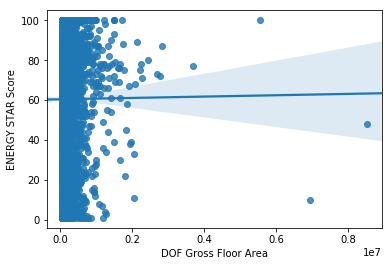

In [11]:
# Visualizar a correlação entre essas variáveis
sns.regplot(x = "DOF Gross Floor Area", y = "ENERGY STAR Score", fit_reg = True, data = arquivo)

In [12]:
# Como a variável target varia do mínimo até o máximo quando DOF Gross Floor Area é NaN
# vou substituir NaN pelo seu valor mínimo
arquivo['DOF Gross Floor Area'].fillna((arquivo['DOF Gross Floor Area'].min()), inplace = True)

In [13]:
# Checar o resultado:
arquivo['DOF Gross Floor Area'].isna().sum()

0

In [14]:
# Identificar o perfil da variável Water Required
arquivo['Water Required?'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [15]:
# Perfil da variável ENERGY STAR Score com valores NA em Water Required?
arquivo[arquivo['Water Required?'].isnull()]['ENERGY STAR Score'].describe()

count     43.000000
mean      67.232558
std       35.639623
min        2.000000
25%       36.500000
50%       86.000000
75%      100.000000
max      100.000000
Name: ENERGY STAR Score, dtype: float64

In [16]:
# Substituir NA por No
arquivo['Water Required?'].fillna('No', inplace = True)

In [17]:
# Verificar o resultado
arquivo['Water Required?'].isna().sum()

0

In [18]:
# Substituir Yes por 1 e No por zero em Water Required?
arquivo['Water Required?'].replace(
    to_replace = ['Yes'],
    value = 1,
    inplace = True)

arquivo['Water Required?'].replace(
    to_replace = ['No'],
    value = 0,
    inplace = True)

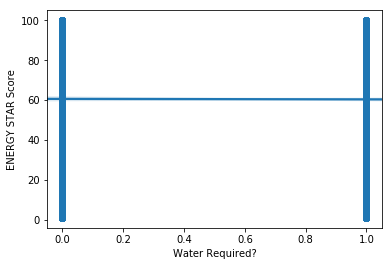

In [19]:
# Visualizar a correlação entre essas variáveis
sns.regplot(x = "Water Required?", y = "ENERGY STAR Score", fit_reg = True, data = arquivo)

In [20]:
# Identificar o perfil da variável DOF Benchmarking Submission Status
arquivo['DOF Benchmarking Submission Status'].unique()

array(['In Compliance', nan], dtype=object)

In [21]:
# Substituir o termo 'In Compliance' por 1 e demais por zero
arquivo['DOF Benchmarking Submission Status'] = arquivo['DOF Benchmarking Submission Status'].map({'In Compliance': 1, 'nan': 0})

In [22]:
# Substituir NA por zero
arquivo['DOF Benchmarking Submission Status'].fillna(0, inplace = True)

In [23]:
# Verificar o resultado
arquivo['DOF Benchmarking Submission Status'].isna().sum()

0

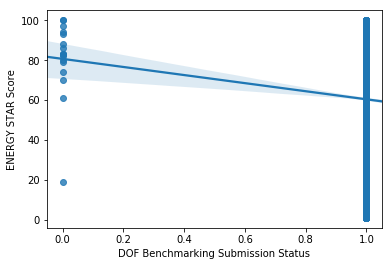

In [24]:
# Visualizar a correlação entre essas variáveis
sns.regplot(x = "DOF Benchmarking Submission Status", y = "ENERGY STAR Score", fit_reg = True, data = arquivo)

In [25]:
# Identificar o perfil da variável Community Board
arquivo[arquivo['Community Board'].isna()].describe()
# Quando Community Board é NaN, Council District e Census Tract também são, checar se essas
# variáveis estão relacionadas

,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Water Required?,DOF Benchmarking Submission Status,Community Board,Council District,Census Tract
count,1.252000e+03,1.252000e+03,1.252000e+03,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1.252000e+03,1252.000000,1252.000000,1252.000000,0.0,0.0,0.0
mean,3.775948e+06,1.456487e+05,1.449413e+05,1955.871406,2.126198,99.113419,62.517572,79.863179,1.465375e+05,122.812460,0.708466,0.996805,NaN,NaN,NaN
std,1.036842e+06,2.499970e+05,2.684564e+05,23.911312,8.418038,5.722457,28.839375,34.820310,2.704235e+05,54.813225,0.454650,0.056456,NaN,NaN,NaN
min,1.160897e+06,5.002800e+04,2.600000e+04,1649.000000,1.000000,0.000000,1.000000,0.000000,1.995400e+04,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2.804248e+06,6.500000e+04,6.701650e+04,1940.000000,1.000000,100.000000,41.000000,62.200000,6.786975e+04,94.675000,0.000000,1.000000,NaN,NaN,NaN
50%,3.527520e+06,9.551950e+04,9.592450e+04,1954.000000,1.000000,100.000000,68.000000,80.250000,9.768200e+04,118.700000,1.000000,1.000000,NaN,NaN,NaN
75%,4.442301e+06,1.500000e+05,1.480165e+05,1964.000000,1.000000,100.000000,87.000000,96.725000,1.500000e+05,144.150000,1.000000,1.000000,NaN,NaN,NaN
max,5.990126e+06,6.940450e+06,6.940450e+06,2016.000000,140.000000,100.000000,100.000000,204.800000,6.940450e+06,576.800000,1.000000,1.000000,NaN,NaN,NaN


In [26]:
# Council District
arquivo['Community Board'].corr(arquivo['Council District'])
# Fracamente correlacionada

0.4769824236640178

In [27]:
# Census Tract
arquivo['Community Board'].corr(arquivo['Census Tract'])
# Não está correlacionada

0.18149025210494235

In [28]:
# Identificar o perfil da variável Community Board com valores NaN
arquivo['Community Board'].describe()

count    5370.000000
mean        7.343203
std         3.952419
min         1.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        18.000000
Name: Community Board, dtype: float64

In [29]:
# Perfil da variável ENERGY STAR Score com valores NA em Community Board
arquivo[arquivo['Community Board'].isnull()]['ENERGY STAR Score'].describe()

count    1252.000000
mean       62.517572
std        28.839375
min         1.000000
25%        41.000000
50%        68.000000
75%        87.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

In [30]:
# Perfil da variável ENERGY STAR Score sem valores NA em Community Board
arquivo[arquivo['Community Board'] >= 1]['ENERGY STAR Score'].describe()

count    5370.000000
mean       60.001676
std        29.561043
min         1.000000
25%        37.000000
50%        65.000000
75%        85.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

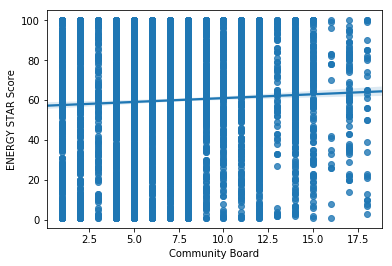

In [31]:
# Visualizar a correlação entre essas variáveis
sns.regplot(x = 'Community Board', y = 'ENERGY STAR Score', fit_reg = True, data = arquivo)

In [32]:
# Substituir NA pela média
arquivo['Community Board'].fillna(arquivo['Community Board'].mean(), inplace = True)

In [33]:
# Verificar o resultado
arquivo['Community Board'].isna().sum()

0

In [34]:
# Identificar o perfil da variável Water Required
arquivo['Council District'].unique()

array([nan, 10.,  4.,  8.,  7.,  1., 11., 12., 47.,  9., 41.,  3., 49.,
        6., 18., 35., 51., 34., 17., 15.,  2.,  5., 16., 14., 33., 13.,
       39., 38., 40., 36., 37., 42., 45., 44., 43., 48., 46., 30., 29.,
       31., 32., 50.])

In [35]:
arquivo['Council District'].describe()

count    5370.000000
mean       16.422533
std        15.864064
min         1.000000
25%         4.000000
50%        10.000000
75%        33.000000
max        51.000000
Name: Council District, dtype: float64

In [36]:
# Perfil da variável ENERGY STAR Score com valores NA em Water Required?
arquivo[arquivo['Council District'].isnull()]['ENERGY STAR Score'].describe()

count    1252.000000
mean       62.517572
std        28.839375
min         1.000000
25%        41.000000
50%        68.000000
75%        87.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

In [37]:
# Perfil da variável ENERGY STAR Score com valores NA em Water Required?
arquivo[arquivo['Council District'].isnull()]['ENERGY STAR Score'].describe()

count    1252.000000
mean       62.517572
std        28.839375
min         1.000000
25%        41.000000
50%        68.000000
75%        87.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

In [38]:
# Substituir NA pela média
arquivo['Council District'].fillna(arquivo['Council District'].mean(), inplace = True)

In [39]:
# Verificar o resultado
arquivo['Council District'].isna().sum()

0

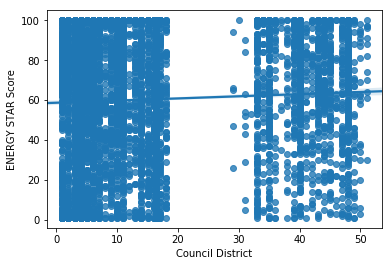

In [40]:
# Visualizar a correlação entre essas variáveis
sns.regplot(x = "Council District", y = "ENERGY STAR Score", fit_reg = True, data = arquivo)

In [41]:
# Identificar o perfil da variável Census Tract
arquivo['Census Tract'].describe()

count      5370.000000
mean       5043.087896
std       13028.985484
min           1.000000
25%         105.000000
50%         218.000000
75%         549.000000
max      105804.000000
Name: Census Tract, dtype: float64

In [42]:
# Perfil da variável ENERGY STAR Score com valores NA em Census Tract
arquivo[arquivo['Census Tract'].isnull()]['ENERGY STAR Score'].describe()

count    1252.000000
mean       62.517572
std        28.839375
min         1.000000
25%        41.000000
50%        68.000000
75%        87.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

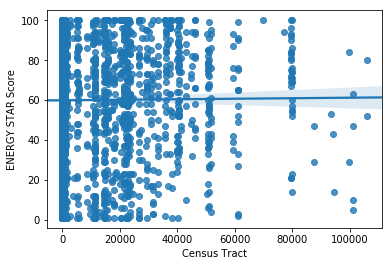

In [43]:
# Visualizar a correlação entre essas variáveis
sns.regplot(x = 'Census Tract', y = "ENERGY STAR Score", fit_reg = True, data = arquivo)

In [44]:
# Substituir Na pela média
arquivo['Census Tract'].fillna(arquivo['Census Tract'].mean(), inplace = True)

In [45]:
# Verificar o resultado
arquivo['Census Tract'].isna().sum()

0

In [46]:
# Todas as variáveis com valores Na foram tratadas e nenhuma delas apresentou correlação com alvo
arquivo.corr()

,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Water Required?,DOF Benchmarking Submission Status,Community Board,Council District,Census Tract
Property Id,1.000000,-0.108538,-0.101013,0.056441,-0.001148,-0.112788,-0.052091,-0.038300,-0.110824,-0.068720,0.024810,-0.024678,-0.006858,0.044767,0.012026
DOF Gross Floor Area,-0.108538,1.000000,0.895674,0.138135,0.054449,-0.057348,0.003154,0.040055,0.902799,0.158471,-0.074050,0.011358,-0.142908,-0.139297,-0.037094
Largest Property Use Type - Gross Floor Area (ft²),-0.101013,0.895674,1.000000,0.128308,0.066585,-0.061738,0.014289,0.033005,0.993997,0.145634,-0.078162,0.011273,-0.142432,-0.145998,-0.043944
Year Built,0.056441,0.138135,0.128308,1.000000,0.022434,0.001045,-0.121421,-0.002224,0.129072,0.079919,-0.029068,-0.029520,-0.037883,0.105423,0.002347
Number of Buildings - Self-reported,-0.001148,0.054449,0.066585,0.022434,1.000000,0.008920,-0.020088,0.007724,0.062600,-0.013941,-0.007817,-0.009313,0.007445,0.018060,0.008562
Occupancy,-0.112788,-0.057348,-0.061738,0.001045,0.008920,1.000000,-0.042779,0.054838,-0.063886,-0.014422,0.033239,-0.003529,0.077111,0.055983,0.027323
ENERGY STAR Score,-0.052091,0.003154,0.014289,-0.121421,-0.020088,-0.042779,1.000000,-0.725326,0.013894,-0.639500,-0.003836,-0.034861,0.046443,0.052306,0.005155
Site EUI (kBtu/ft²),-0.038300,0.040055,0.033005,-0.002224,0.007724,0.054838,-0.725326,1.000000,0.036530,0.800262,0.007080,0.018914,0.021041,-0.031192,0.015566
Property GFA - Self-Reported (ft²),-0.110824,0.902799,0.993997,0.129072,0.062600,-0.063886,0.013894,0.036530,1.000000,0.160289,-0.084754,0.011468,-0.148748,-0.153502,-0.046586
Source EUI (kBtu/ft²),-0.068720,0.158471,0.145634,0.079919,-0.013941,-0.014422,-0.639500,0.800262,0.160289,1.000000,-0.077062,-0.002468,-0.185961,-0.183826,-0.064358


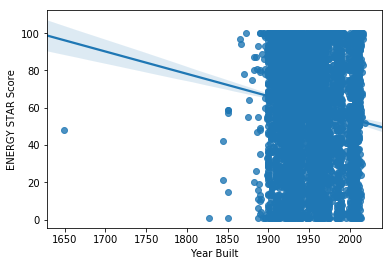

In [47]:
sns.regplot(x = 'Year Built', y = 'ENERGY STAR Score', fit_reg = True, data = arquivo)

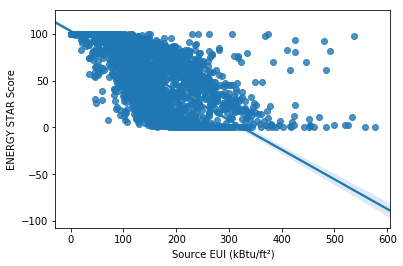

In [48]:
sns.regplot(x = 'Source EUI (kBtu/ft²)', y = 'ENERGY STAR Score', fit_reg = True, data = arquivo)

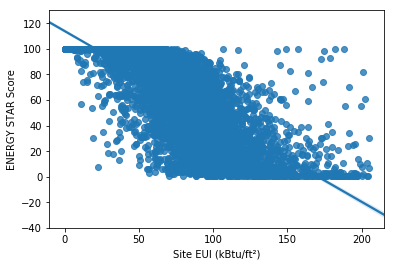

In [49]:
sns.regplot(x = 'Site EUI (kBtu/ft²)', y = 'ENERGY STAR Score', fit_reg = True, data = arquivo)

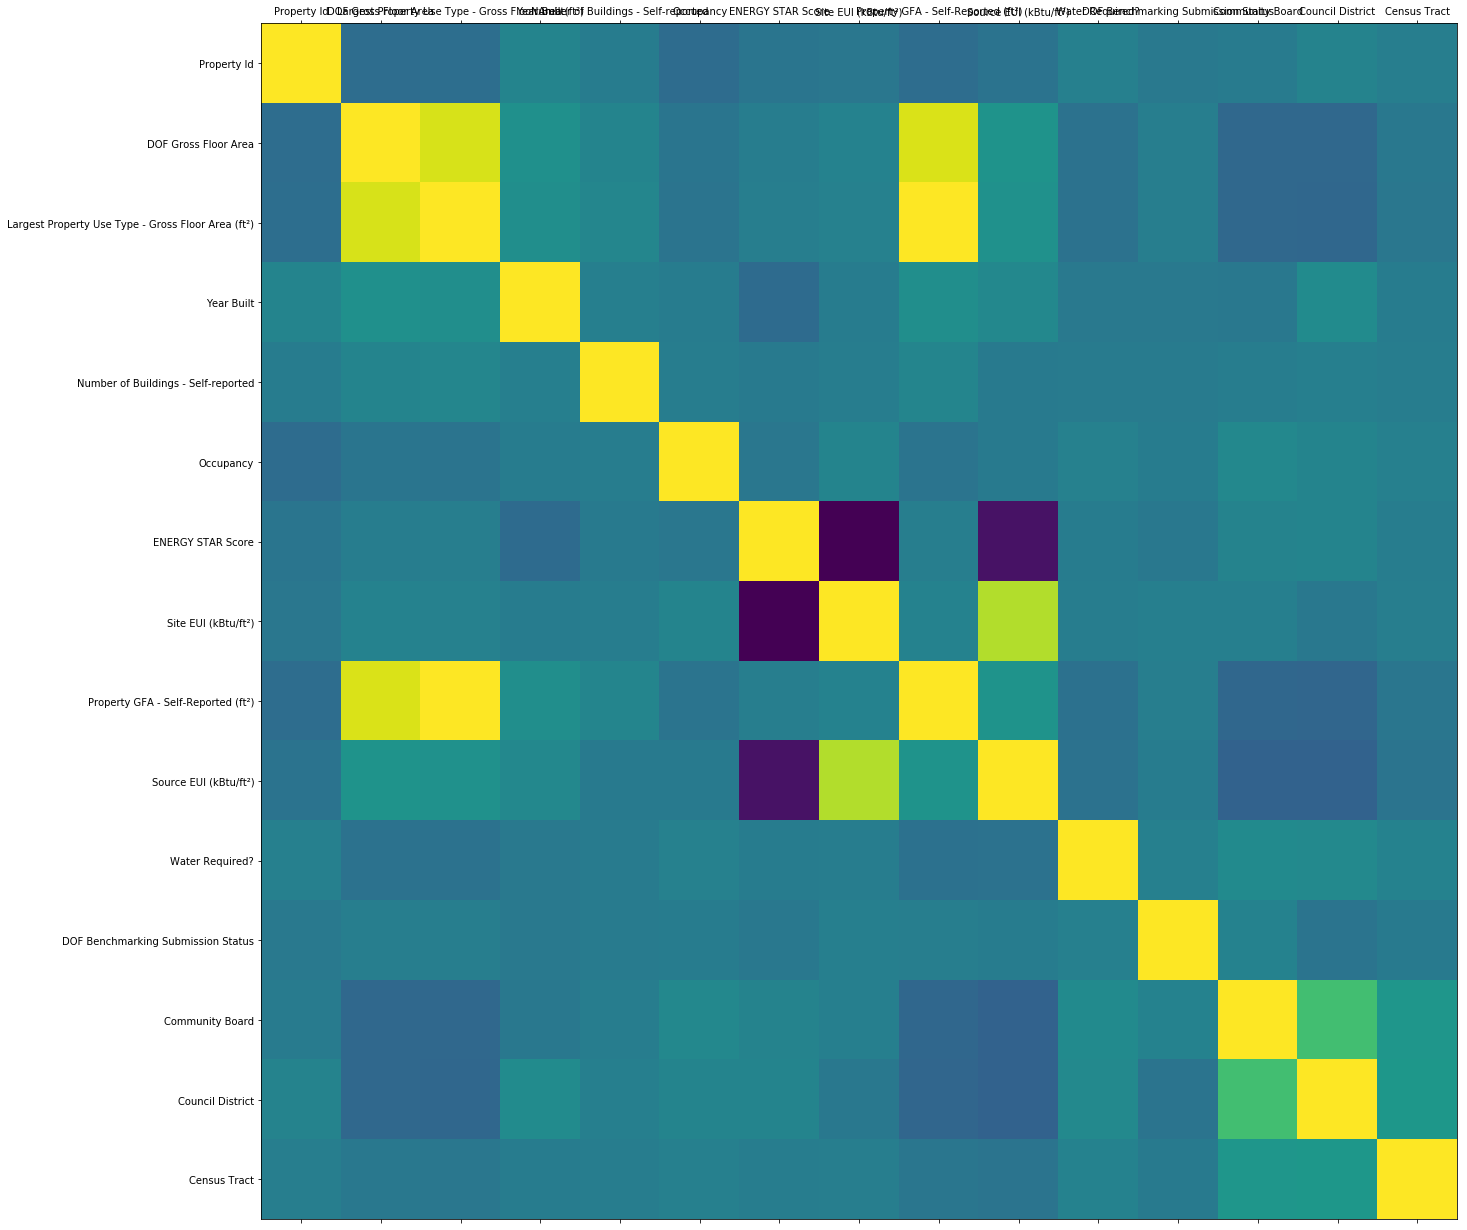

In [53]:
def plot_corr(arquivo, size = 22):
    corr = arquivo.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

plot_corr(arquivo)

<p>Conforme acima, os campos com maior correlação, negativa diga-se de passagem, são (ordem crescente):
Source EUI (kBtu/ft²) e Site EUI (kBtu/ft²). Essas variáveis não possuíam valores NaN.</p>
<p>Assim, o modelo será criado com base nelas.</p>

<b>6. Criar DataFrame treinamento com as observações destacadas acima</b>

In [68]:
colnames = ['Site EUI (kBtu/ft²)', 
            'Source EUI (kBtu/ft²)',
            'ENERGY STAR Score']
treinamento = arquivo[colnames]

In [69]:
# Dados dataframe treinamento
treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 3 columns):
Site EUI (kBtu/ft²)      6622 non-null float64
Source EUI (kBtu/ft²)    6622 non-null float64
ENERGY STAR Score        6622 non-null int64
dtypes: float64(2), int64(1)
memory usage: 155.3 KB


In [70]:
# Buscar por valores NA
treinamento.isna().sum()

Site EUI (kBtu/ft²)      0
Source EUI (kBtu/ft²)    0
ENERGY STAR Score        0
dtype: int64

In [71]:
# Verificando a existência de valores zerados
treinamento.describe()

,Site EUI (kBtu/ft²),Source EUI (kBtu/ft²),ENERGY STAR Score
count,6622.000000,6622.000000,6622.000000
mean,80.122350,133.982936,60.477348
std,32.013067,59.484419,29.440291
min,0.000000,0.000000,1.000000
25%,62.700000,100.000000,38.000000
50%,78.500000,123.650000,66.000000
75%,95.900000,157.200000,86.000000
max,204.800000,576.800000,100.000000


In [66]:
# Substituir o valor zero pelo valor do primeiro quartil
treinamento[treinamento['Site EUI (kBtu/ft²)'] == 0] = 62.7

/home/angelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/angelo/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<b>7. Treinando o modelo</b>

In [ ]:
# Marcar como Y o valor do alvo:
y = treinamento['ENERGY STAR Score']

In [ ]:
# Alterar o conteúdo da lista de colunas para selecionar as variáveis preditoras do modelo
colnames.remove('ENERGY STAR Score')

In [ ]:
X = treinamento[colnames]

In [ ]:
# Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
# Criar instância do modelo
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
# Treinar o modelo
lm.fit(X_train,y_train)

<b>7.1. Coeficientes</b>

In [ ]:
nome_colunas = ['Variável', 'Coeficiente']
var_x_coef = pd.DataFrame(columns = nome_colunas)
var_x_coef['Variável'] = colnames
var_x_coef['Coeficiente'] = lm.coef_
var_x_coef.head(10)

<b>7.2. Fazendo as previsões</b>

In [ ]:
predictions = lm.predict( X_test)

<b>7.3. Diagrama de dispersão entre valores reais e preditos</b>

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

<b>7.4. Avaliando o modelo</b>

In [ ]:
sns.distplot((y_test-predictions),bins=50)

<b>7.5. Impressão das métricas</b>

In [ ]:
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_test, predictions))

<b>8. Preparar resposta ao Kaggle</b>

<b>8.1. Importar arquivo de teste</b>

In [72]:
arq_teste = pd.read_csv('dataset_teste.csv')

<b>8.2. Visualizar dados do arquivo de teste e identificar eventuais necessidades de tratamento</b>

In [73]:
arq_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 59 columns):
OrderId                                                       2839 non-null int64
Property Id                                                   2839 non-null int64
Property Name                                                 2839 non-null object
Parent Property Id                                            2839 non-null object
Parent Property Name                                          2839 non-null object
BBL - 10 digits                                               2837 non-null object
NYC Borough, Block and Lot (BBL) self-reported                2839 non-null object
NYC Building Identification Number (BIN)                      2839 non-null object
Address 1 (self-reported)                                     2839 non-null object
Address 2                                                     2839 non-null object
Postal Code                                                   283

In [76]:
colunas_teste = ['Site EUI (kBtu/ft²)', 
            'Source EUI (kBtu/ft²)']
arq_teste[colunas_teste].describe()

,Site EUI (kBtu/ft²),Source EUI (kBtu/ft²)
count,2839.000000,2839.000000
mean,79.679641,132.974392
std,31.823974,59.562036
min,0.000000,0.000000
25%,62.300000,98.300000
50%,78.000000,122.100000
75%,95.450000,155.450000
max,204.800000,577.900000


<b>8.3. Excluir as mesmas colunas do arquivo de teste</b>

In [ ]:
# Antes de excluir, armazenar os valores de Property Id
proprietarios = arq_teste['Property Id']

In [ ]:
# Gerar novo data frame com somente as variáveis preditoras
arq_teste2 = arq_teste[colnames]

In [ ]:
# Gerar o modelo novamente mas com todas as variáveis preditoras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state = 101)
lm = LinearRegression()
lm.fit(X_train, y_train)

<b>8.4. Identificar a presença de valores NA</b>

In [ ]:
arq_teste2.isna().sum()

<b>8.5. Fazendo as previsões</b>

In [ ]:
predict_arq_teste = lm.predict(arq_teste2)

In [ ]:
predict_arq_teste.itemsize

In [ ]:
predict_arq_teste.shape

In [ ]:
predict_arq_teste.argmax()

In [ ]:
predict_arq_teste.max()

In [ ]:
predict_arq_teste.min()

In [ ]:
predict_arq_teste[predict_arq_teste < 0] = predict_arq_teste[predict_arq_teste < 0] * (-1)

In [ ]:
# Armazenar o resultado em dataframe:
nome_colunas = ['Property Id', 'score']

In [ ]:
resposta = pd.DataFrame(columns = nome_colunas)

In [ ]:
resposta['Property Id'] = proprietarios

In [ ]:
resposta['score'] = predict_arq_teste.astype('int64')

<b>8.6. Armazenar o dataframe em arquivo csv</b>

In [ ]:
resposta.describe()

In [ ]:
resposta[resposta['score'] < 0].count()

In [ ]:
resposta[resposta['Property Id'] < 0].count()

In [ ]:
resposta.info()

In [ ]:
resposta.to_csv('resposta3.csv', index = False)

In [ ]:
uai = pd.read_csv('resposta3.csv')

In [ ]:
uai[uai['Property Id'] < 0].count()

In [ ]:
arq_teste[arq_teste['Property Id'] < 0].count()